# Credit Score

## Project Description

## Import Libraries and Dataset

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
import numpy as np

#Display all columns
pd.set_option('display.max_columns', 999)
#pd.get_option("display.max_rows")
#pd.set_option('max_colwidth', 100)

In [2]:
train_df = pd.read_csv('Train.csv')
train_df.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,AmountLoan,Currency,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,9/21/2018 12:17,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,9/25/2018 9:20,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,9/25/2018 10:33,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,9/27/2018 10:26,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,9/27/2018 12:44,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Checking Na values
train_df.isna().sum()

CustomerId                 0
TransactionStartTime       0
Value                      0
Amount                     0
TransactionId              0
BatchId                    0
SubscriptionId             0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
TransactionStatus          0
IssuedDateLoan           612
AmountLoan               612
Currency                 612
LoanId                   612
PaidOnDate               612
IsFinalPayBack           612
InvestorId               612
DueDate                  614
LoanApplicationId        617
PayBackId                612
ThirdPartyId             614
IsThirdPartyConfirmed    612
IsDefaulted              612
dtype: int64

In [4]:
#Checking Unique values
train_df.nunique() 

CustomerId                421
TransactionStartTime     1606
Value                      98
Amount                     77
TransactionId            1758
BatchId                  1713
SubscriptionId              6
CurrencyCode                1
CountryCode                 1
ProviderId                  1
ProductId                  16
ProductCategory             7
ChannelId                   1
TransactionStatus           2
IssuedDateLoan           1101
AmountLoan                647
Currency                    1
LoanId                   1159
PaidOnDate               1427
IsFinalPayBack              2
InvestorId                  3
DueDate                  1101
LoanApplicationId        1156
PayBackId                1485
ThirdPartyId             1481
IsThirdPartyConfirmed       2
IsDefaulted                 2
dtype: int64

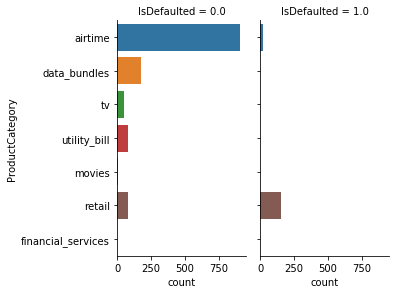

In [5]:
#Comparing Product category transactions if defaulted or not
g = sns.catplot(y="ProductCategory", col="IsDefaulted",
                data=train_df, kind="count",
                height=4, aspect=.7);

In [6]:
#Average number of transaction per customer
CustomerId_all = train_df.groupby('CustomerId').TransactionId.count()
CustomerId_all.describe()

count    421.000000
mean       4.988124
std        7.984649
min        1.000000
25%        1.000000
50%        2.000000
75%        6.000000
max      100.000000
Name: TransactionId, dtype: float64

In [8]:
#TransactionId_defaulted = df_defaulted.groupby('CustomerId').TransactionId.count()
#TransactionId_defaulted.describe()

## Defaulted caracteristics

In [9]:
#Select only defaulted
df_defaulted = train_df[(train_df['IsDefaulted'] == 1)]
#Group defaulted customer by CustomerId
groupby_CustomerId = df_defaulted.groupby('CustomerId').sum()
len(groupby_CustomerId)

69

In [10]:
#Defaulted loans caracteristics
groupby_CustomerId.AmountLoan.describe()

count        69.000000
mean      47164.202899
std       48226.195458
min         500.000000
25%        5000.000000
50%       35000.000000
75%       64000.000000
max      192000.000000
Name: AmountLoan, dtype: float64

In [11]:
#Checking number of loans per defaulted customer
df_defaulted.nunique()


CustomerId                69
TransactionStartTime      53
Value                     12
Amount                    11
TransactionId             71
BatchId                   71
SubscriptionId             3
CurrencyCode               1
CountryCode                1
ProviderId                 1
ProductId                  6
ProductCategory            4
ChannelId                  1
TransactionStatus          1
IssuedDateLoan            53
AmountLoan                42
Currency                   1
LoanId                    71
PaidOnDate               177
IsFinalPayBack             2
InvestorId                 2
DueDate                   54
LoanApplicationId         71
PayBackId                178
ThirdPartyId             175
IsThirdPartyConfirmed      2
IsDefaulted                1
dtype: int64

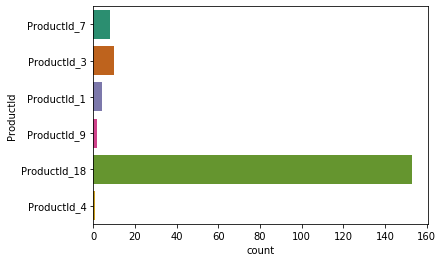

In [12]:
#Visualising Most defaulted loans products

m = sns.countplot(data=df_defaulted, y = 'ProductId', palette='Dark2', orient = 'v')

In [13]:
#Visualising defaulted values grouped by loan products
groupby_ProductId = df_defaulted.groupby('ProductId').sum()
groupby_ProductId

,Value,Amount,CountryCode,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted
ProductId,,,,,,,,
ProductId_1,36000.0,-36000.0,1024,4,6780.0,0.0,4.0,4.0
ProductId_18,35976000.0,-35976000.0,39168,153,3202500.0,2.0,152.0,153.0
ProductId_3,49000.0,-49000.0,2560,10,19790.0,0.0,10.0,10.0
ProductId_4,5000.0,-5000.0,256,1,900.0,0.0,1.0,1.0
ProductId_7,74998.0,-74998.0,2048,8,17695.0,1.0,7.0,8.0
ProductId_9,25790.0,-23000.0,512,2,6665.0,0.0,2.0,2.0


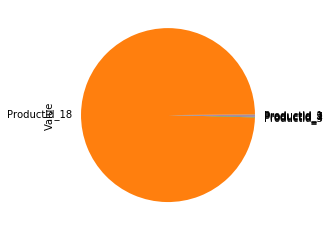

In [14]:
#Most defaulted productID VAlue
groupby_ProductId.Value.plot(kind='pie')

In [15]:
groupby_ProductCategory = df_defaulted.groupby('ProductCategory').sum()

In [16]:
groupby_ProductCategory

,Value,Amount,CountryCode,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted
ProductCategory,,,,,,,,
airtime,159998.0,-159998.0,5632,22,44265.0,1.0,21.0,22.0
data_bundles,5000.0,-5000.0,256,1,900.0,0.0,1.0,1.0
retail,35976000.0,-35976000.0,39168,153,3202500.0,2.0,152.0,153.0
utility_bill,25790.0,-23000.0,512,2,6665.0,0.0,2.0,2.0


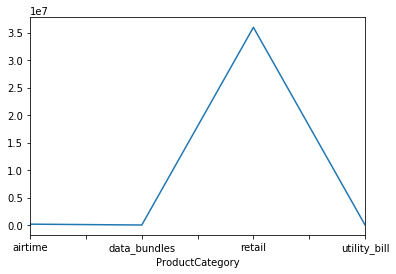

In [17]:
groupby_ProductCategory.Value.plot()

/home/h/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


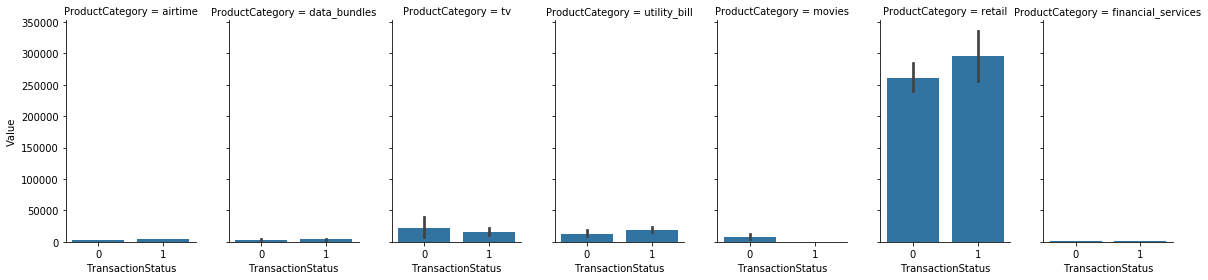

In [18]:
#Number of transaction fail/Succeded per Product Category
g = sns.FacetGrid(train_df, col="ProductCategory", height=4, aspect=.6)
g.map(sns.barplot, "TransactionStatus", "Value");

In [19]:
#Top 10 default customer
defaulted_customer = df_defaulted.groupby('CustomerId').sum()
defaulted_customer.describe()
#defaulted_customer.sort_values('TransactionStatus').tail(10)

,Value,Amount,CountryCode,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted
count,6.900000e+01,6.900000e+01,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,5.241563e+05,-5.241159e+05,660.405797,2.579710,47164.202899,0.043478,2.550725,2.579710
std,6.100619e+05,6.100963e+05,542.002451,2.117197,48226.195458,0.205425,2.090147,2.117197
min,1.500000e+03,-3.078000e+06,256.000000,1.000000,500.000000,0.000000,1.000000,1.000000
25%,2.800000e+04,-7.680000e+05,256.000000,1.000000,5000.000000,0.000000,1.000000,1.000000
50%,3.420000e+05,-3.420000e+05,512.000000,2.000000,35000.000000,0.000000,2.000000,2.000000
75%,7.680000e+05,-2.800000e+04,1024.000000,4.000000,64000.000000,0.000000,4.000000,4.000000
max,3.078000e+06,-1.500000e+03,2304.000000,9.000000,192000.000000,1.000000,9.000000,9.000000


In [20]:
groupby_CustomerId

,Value,Amount,CountryCode,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted
CustomerId,,,,,,,,
CustomerId_10,1344000.0,-1344000.0,1792,7,97000.0,0.0,7.0,7.0
CustomerId_116,1536000.0,-1536000.0,2048,8,128000.0,0.0,7.0,8.0
CustomerId_117,192000.0,-192000.0,256,1,46000.0,0.0,1.0,1.0
CustomerId_120,8000.0,-8000.0,512,2,4780.0,0.0,2.0,2.0
CustomerId_124,684000.0,-684000.0,512,2,64000.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...
CustomerId_63,576000.0,-576000.0,768,3,25000.0,0.0,3.0,3.0
CustomerId_65,342000.0,-342000.0,256,1,64000.0,0.0,1.0,1.0
CustomerId_76,192000.0,-192000.0,256,1,32000.0,0.0,1.0,1.0


In [21]:
#Drop na values
train_df_na = train_df.dropna()

In [22]:
#Removing useless columns
train_df_removed = train_df_na.drop(["CustomerId","TransactionId","Amount","BatchId","CurrencyCode","CountryCode","ProviderId","ChannelId","Currency","LoanId","LoanApplicationId","PayBackId","ThirdPartyId","PaidOnDate","DueDate"], axis=1)
train_df_removed.head()

,TransactionStartTime,Value,SubscriptionId,ProductId,ProductCategory,TransactionStatus,IssuedDateLoan,AmountLoan,IsFinalPayBack,InvestorId,IsThirdPartyConfirmed,IsDefaulted
15,10/22/2018 16:04,5000.0,SubscriptionId_4,ProductId_7,airtime,1,10/22/2018 16:04,5375.0,1.0,InvestorId_3,0.0,0.0
17,10/23/2018 13:12,500.0,SubscriptionId_1,ProductId_7,airtime,1,10/23/2018 13:12,543.0,1.0,InvestorId_2,0.0,0.0
18,10/23/2018 15:20,1000.0,SubscriptionId_1,ProductId_7,airtime,1,10/23/2018 15:20,1085.0,1.0,InvestorId_2,0.0,0.0
19,10/23/2018 15:31,500.0,SubscriptionId_1,ProductId_7,airtime,1,10/24/2018 6:34,543.0,1.0,InvestorId_2,0.0,0.0
20,10/24/2018 6:56,500.0,SubscriptionId_1,ProductId_4,data_bundles,1,10/24/2018 6:56,543.0,1.0,InvestorId_2,0.0,0.0


In [23]:
#Convert TransactionStartTime in datetime and separate day/month/year/minute/second
train_df_removed['TransactionStartTime'] =  pd.to_datetime(train_df_removed['TransactionStartTime'])
train_df_removed['TransactionStartTime_day'] = train_df_removed['TransactionStartTime'].dt.day
train_df_removed['TransactionStartTime_month'] = train_df_removed['TransactionStartTime'].dt.month
train_df_removed['TransactionStartTime_year'] = train_df_removed['TransactionStartTime'].dt.year
train_df_removed['TransactionStartTime_minute'] = train_df_removed['TransactionStartTime'].dt.minute
train_df_removed['TransactionStartTime_hour'] = train_df_removed['TransactionStartTime'].dt.hour
#& remove transactionStartTime
train_df_removed = train_df_removed.drop(["TransactionStartTime"], axis=1)
train_df_removed

,Value,SubscriptionId,ProductId,ProductCategory,TransactionStatus,IssuedDateLoan,AmountLoan,IsFinalPayBack,InvestorId,IsThirdPartyConfirmed,IsDefaulted,TransactionStartTime_day,TransactionStartTime_month,TransactionStartTime_year,TransactionStartTime_minute,TransactionStartTime_hour
15,5000.0,SubscriptionId_4,ProductId_7,airtime,1,10/22/2018 16:04,5375.0,1.0,InvestorId_3,0.0,0.0,22,10,2018,4,16
17,500.0,SubscriptionId_1,ProductId_7,airtime,1,10/23/2018 13:12,543.0,1.0,InvestorId_2,0.0,0.0,23,10,2018,12,13
18,1000.0,SubscriptionId_1,ProductId_7,airtime,1,10/23/2018 15:20,1085.0,1.0,InvestorId_2,0.0,0.0,23,10,2018,20,15
19,500.0,SubscriptionId_1,ProductId_7,airtime,1,10/24/2018 6:34,543.0,1.0,InvestorId_2,0.0,0.0,23,10,2018,31,15
20,500.0,SubscriptionId_1,ProductId_4,data_bundles,1,10/24/2018 6:56,543.0,1.0,InvestorId_2,0.0,0.0,24,10,2018,56,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2000.0,SubscriptionId_7,ProductId_8,data_bundles,1,3/30/2019 21:55,2370.0,1.0,InvestorId_1,1.0,0.0,30,3,2019,55,21
2096,5000.0,SubscriptionId_7,ProductId_7,airtime,1,3/30/2019 23:54,5925.0,1.0,InvestorId_1,1.0,0.0,30,3,2019,54,23
2097,5000.0,SubscriptionId_7,ProductId_3,airtime,1,3/31/2019 5:40,7100.0,1.0,InvestorId_1,1.0,0.0,31,3,2019,40,5
2098,1500.0,SubscriptionId_7,ProductId_8,data_bundles,1,3/31/2019 9:37,1733.0,1.0,InvestorId_1,1.0,0.0,31,3,2019,37,9


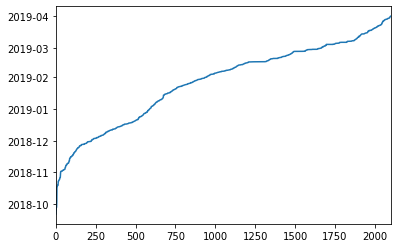

In [24]:
train_df['TransactionStartTime'] =  pd.to_datetime(train_df['TransactionStartTime'])
train_df['TransactionStartTime'].plot()

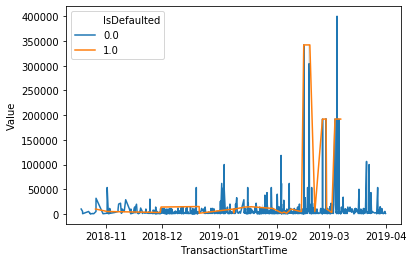

In [25]:
normalised_df = train_df.loc[train_df['Value'] <= 500000]

ax = sns.lineplot(y="Value", x="TransactionStartTime", hue="IsDefaulted",
                  data=normalised_df)

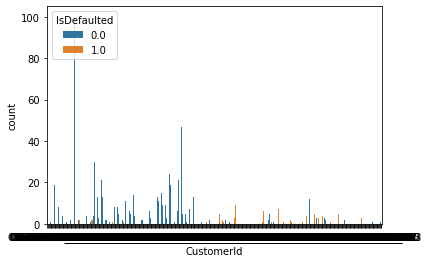

In [26]:
ax = sns.countplot(x="CustomerId", hue="IsDefaulted",
                  data=normalised_df)

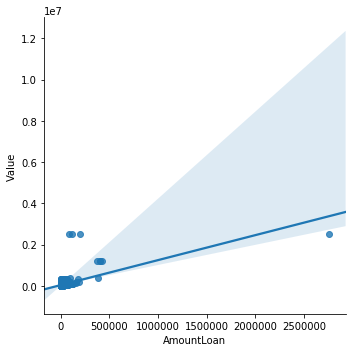

In [27]:
g = sns.lmplot(x="AmountLoan", y = "Value", data=train_df)

In [28]:
#Convert IssuedDateLoan in datetime and separate day/month/year/minute/second
train_df_removed['IssuedDateLoan'] =  pd.to_datetime(train_df_removed['IssuedDateLoan'])
train_df_removed['IssuedDateLoan_day'] = train_df_removed['IssuedDateLoan'].dt.day
train_df_removed['IssuedDateLoan_month'] = train_df_removed['IssuedDateLoan'].dt.month
train_df_removed['IssuedDateLoan_year'] = train_df_removed['IssuedDateLoan'].dt.year
train_df_removed['IssuedDateLoan_minute'] = train_df_removed['IssuedDateLoan'].dt.minute
train_df_removed['IssuedDateLoan_hour'] = train_df_removed['IssuedDateLoan'].dt.hour
#& remove IssuedDateLoan
train_df_removed = train_df_removed.drop(['IssuedDateLoan'], axis=1)
train_df_removed

,Value,SubscriptionId,ProductId,ProductCategory,TransactionStatus,AmountLoan,IsFinalPayBack,InvestorId,IsThirdPartyConfirmed,IsDefaulted,TransactionStartTime_day,TransactionStartTime_month,TransactionStartTime_year,TransactionStartTime_minute,TransactionStartTime_hour,IssuedDateLoan_day,IssuedDateLoan_month,IssuedDateLoan_year,IssuedDateLoan_minute,IssuedDateLoan_hour
15,5000.0,SubscriptionId_4,ProductId_7,airtime,1,5375.0,1.0,InvestorId_3,0.0,0.0,22,10,2018,4,16,22,10,2018,4,16
17,500.0,SubscriptionId_1,ProductId_7,airtime,1,543.0,1.0,InvestorId_2,0.0,0.0,23,10,2018,12,13,23,10,2018,12,13
18,1000.0,SubscriptionId_1,ProductId_7,airtime,1,1085.0,1.0,InvestorId_2,0.0,0.0,23,10,2018,20,15,23,10,2018,20,15
19,500.0,SubscriptionId_1,ProductId_7,airtime,1,543.0,1.0,InvestorId_2,0.0,0.0,23,10,2018,31,15,24,10,2018,34,6
20,500.0,SubscriptionId_1,ProductId_4,data_bundles,1,543.0,1.0,InvestorId_2,0.0,0.0,24,10,2018,56,6,24,10,2018,56,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2000.0,SubscriptionId_7,ProductId_8,data_bundles,1,2370.0,1.0,InvestorId_1,1.0,0.0,30,3,2019,55,21,30,3,2019,55,21
2096,5000.0,SubscriptionId_7,ProductId_7,airtime,1,5925.0,1.0,InvestorId_1,1.0,0.0,30,3,2019,54,23,30,3,2019,54,23
2097,5000.0,SubscriptionId_7,ProductId_3,airtime,1,7100.0,1.0,InvestorId_1,1.0,0.0,31,3,2019,40,5,31,3,2019,40,5
2098,1500.0,SubscriptionId_7,ProductId_8,data_bundles,1,1733.0,1.0,InvestorId_1,1.0,0.0,31,3,2019,37,9,31,3,2019,37,9


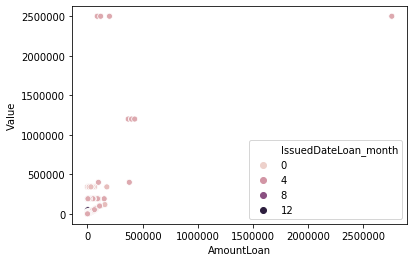

In [29]:
ax = sns.scatterplot(x="AmountLoan", y="Value",
                     hue="IssuedDateLoan_month", data=train_df_removed)

In [30]:
#Encoding data
train_dummies = pd.get_dummies(train_df_removed, columns = ["InvestorId","SubscriptionId","ProductId","ProductCategory","TransactionStartTime_day","TransactionStartTime_month","TransactionStartTime_year","TransactionStartTime_hour","TransactionStartTime_minute",'IssuedDateLoan_day','IssuedDateLoan_month','IssuedDateLoan_year','IssuedDateLoan_minute','IssuedDateLoan_hour'] , prefix_sep = "_",drop_first = True)
train_dummies.head(100)

,Value,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted,InvestorId_InvestorId_2,InvestorId_InvestorId_3,SubscriptionId_SubscriptionId_4,SubscriptionId_SubscriptionId_5,SubscriptionId_SubscriptionId_6,SubscriptionId_SubscriptionId_7,ProductId_ProductId_10,ProductId_ProductId_13,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_17,ProductId_ProductId_18,ProductId_ProductId_2,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill,TransactionStartTime_day_2,TransactionStartTime_day_3,TransactionStartTime_day_4,TransactionStartTime_day_5,TransactionStartTime_day_6,TransactionStartTime_day_7,TransactionStartTime_day_8,TransactionStartTime_day_9,TransactionStartTime_day_10,TransactionStartTime_day_11,TransactionStartTime_day_12,TransactionStartTime_day_13,TransactionStartTime_day_14,TransactionStartTime_day_15,TransactionStartTime_day_16,TransactionStartTime_day_17,TransactionStartTime_day_18,TransactionStartTime_day_19,TransactionStartTime_day_20,TransactionStartTime_day_21,TransactionStartTime_day_22,TransactionStartTime_day_23,TransactionStartTime_day_24,TransactionStartTime_day_25,TransactionStartTime_day_26,TransactionStartTime_day_27,TransactionStartTime_day_28,TransactionStartTime_day_29,TransactionStartTime_day_30,TransactionStartTime_day_31,TransactionStartTime_month_2,TransactionStartTime_month_3,TransactionStartTime_month_10,TransactionStartTime_month_11,TransactionStartTime_month_12,TransactionStartTime_year_2019,TransactionStartTime_hour_1,TransactionStartTime_hour_2,TransactionStartTime_hour_3,TransactionStartTime_hour_4,TransactionStartTime_hour_5,TransactionStartTime_hour_6,TransactionStartTime_hour_7,TransactionStartTime_hour_8,TransactionStartTime_hour_9,TransactionStartTime_hour_10,TransactionStartTime_hour_11,TransactionStartTime_hour_12,TransactionStartTime_hour_13,TransactionStartTime_hour_14,TransactionStartTime_hour_15,TransactionStartTime_hour_16,TransactionStartTime_hour_17,TransactionStartTime_hour_18,TransactionStartTime_hour_19,TransactionStartTime_hour_20,TransactionStartTime_hour_21,TransactionStartTime_hour_22,TransactionStartTime_hour_23,TransactionStartTime_minute_1,TransactionStartTime_minute_2,TransactionStartTime_minute_3,TransactionStartTime_minute_4,TransactionStartTime_minute_5,TransactionStartTime_minute_6,TransactionStartTime_minute_7,TransactionStartTime_minute_8,TransactionStartTime_minute_9,TransactionStartTime_minute_10,TransactionStartTime_minute_11,TransactionStartTime_minute_12,TransactionStartTime_minute_13,TransactionStartTime_minute_14,TransactionStartTime_minute_15,TransactionStartTime_minute_16,TransactionStartTime_minute_17,TransactionStartTime_minute_18,TransactionStartTime_minute_19,TransactionStartTime_minute_20,TransactionStartTime_minute_21,TransactionStartTime_minute_22,TransactionStartTime_minute_23,TransactionStartTime_minute_24,TransactionStartTime_minute_25,TransactionStartTime_minute_26,TransactionStartTime_minute_27,TransactionStartTime_minute_28,TransactionStartTime_minute_29,TransactionStartTime_minute_30,TransactionStartTime_minute_31,TransactionStartTime_minute_32,TransactionStartTime_minute_33,TransactionStartTime_minute_34,TransactionStartTime_minute_35,TransactionStartTime_minute_36,TransactionStartTime_minute_37,TransactionStartTime_minute_38,TransactionStartTime_minute_39,TransactionStartTime_minute_40,TransactionStartTime_minute_41,TransactionStartTime_minute_42,TransactionStartTime_minute_43,TransactionStartTime_minute_44,TransactionStartTime_minute_45,TransactionStartTime_minute_46,TransactionStartTime_minute_47,TransactionStartTime_minute_48,TransactionStartTime_minute_49,TransactionStartTime_minute_50,TransactionStartTime_minute_51,TransactionStartTime_minut

In [31]:
# Data retrieval and preperation.
y = train_dummies['IsDefaulted'].values
print(y.shape)

#Removing IsDefaulted from X values
train_dummies = train_dummies.drop(['IsDefaulted'], axis=1)

columns = list(train_dummies.columns)
X = train_dummies[columns]
X.shape

(1479,)


(1479, 267)

In [32]:
#Using Kbest to select most accurate criterias
selector = SelectKBest(chi2, k=2)
X_new= selector.fit_transform(X, y)

#Display features selected with Kbest
cols = selector.get_support(indices=True)
features_selected = X.iloc[:,cols]
list(features_selected.columns)



['Value', 'AmountLoan']

In [33]:
#Divivde Dataset in training/test with sklearn function
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Decision tree

In [73]:
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


clf = tree.DecisionTreeClassifier(
    criterion='gini',
    splitter='random',
    max_depth=14, 
    min_samples_split=8, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=35, 
    random_state=42, 
    max_leaf_nodes=25, 
    min_impurity_decrease=0.0, 
    min_impurity_split=0.2, 
    class_weight=None
)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 0.9763513513513513
Mean Absolute Error: 0.02364864864864865
Mean Squared Error: 0.02364864864864865
Root Mean Squared Error: 0.1537811713073114
[[258   2]
 [  5  31]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       260
         1.0       0.94      0.86      0.90        36

    accuracy                           0.98       296
   macro avg       0.96      0.93      0.94       296
weighted avg       0.98      0.98      0.98       296



/home/h/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


In [74]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9267094017094017

# Parameter tuning

## Max Depth

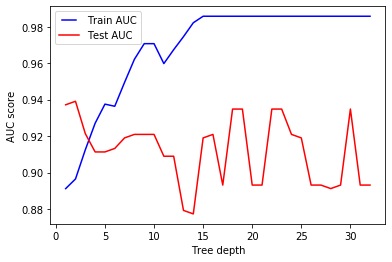

In [51]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = tree.DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

## min_samples_split

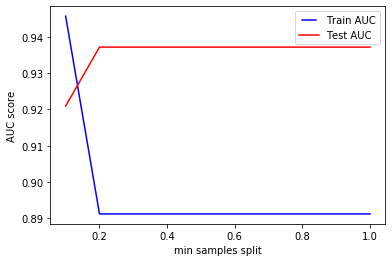

In [57]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

## min_samples_leafs

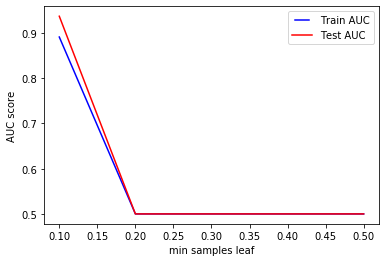

In [59]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

## max_features

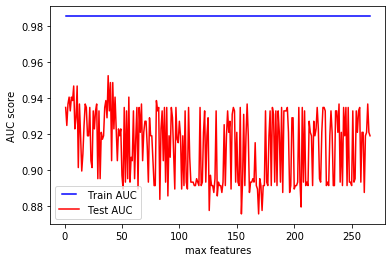

In [68]:
max_features = list(range(1,train_dummies.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = tree.DecisionTreeClassifier(max_features=max_feature)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty = 'l1', random_state=9, solver='liblinear').fit(x_train, y_train)
y_pred = clf.predict(x_test)

print('Accuracy score:', clf.score(x_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 0.9695945945945946
Mean Absolute Error: 0.030405405405405407
Mean Squared Error: 0.030405405405405407
Root Mean Squared Error: 0.17437145811572893
[[256   4]
 [  5  31]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       260
         1.0       0.89      0.86      0.87        36

    accuracy                           0.97       296
   macro avg       0.93      0.92      0.93       296
weighted avg       0.97      0.97      0.97       296



## Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor


regressor = RandomForestRegressor(n_estimators=100,criterion='mse', random_state=0, max_depth=5, max_leaf_nodes=15, bootstrap=False)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

print('Accuracy score:', clf.score(x_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred.round()))
print(classification_report(y_test,y_pred.round()))

Accuracy score: 0.9695945945945946
Mean Absolute Error: 0.07506370006370013
Mean Squared Error: 0.042658864864252063
Root Mean Squared Error: 0.206540225777576
[[250  10]
 [  5  31]]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       260
         1.0       0.76      0.86      0.81        36

    accuracy                           0.95       296
   macro avg       0.87      0.91      0.89       296
weighted avg       0.95      0.95      0.95       296



## XG Boost

In [37]:
from xgboost import XGBClassifier
import xgboost as xgb

In [38]:
param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "error"
param['eta'] = 0.3
param['gamma'] = 0
param['max_depth'] = 6
param['min_child_weight']=1
param['max_delta_step'] = 0
param['subsample']= 1
param['colsample_bytree']=1
param['silent'] = 1
param['seed'] = 0
param['base_score'] = 0.5

model = XGBClassifier(
    booster = 'gbtree',
    eta=0.2,
    gamma = 0,
    max_depth=8,
    colsample_bytree=0.9,
    min_child_weight=1,
    subsample = 1,
    learning_rate=0.05,
    n_estimators=100,
    objective = "binary:logistic",
    random_state=42)
model.fit(x_train, y_train)

# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 97.97%
Mean Absolute Error: 0.02027027027027027
Mean Squared Error: 0.02027027027027027
Root Mean Squared Error: 0.14237369936287486
[[259   1]
 [  5  31]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       260
         1.0       0.97      0.86      0.91        36

    accuracy                           0.98       296
   macro avg       0.97      0.93      0.95       296
weighted avg       0.98      0.98      0.98       296



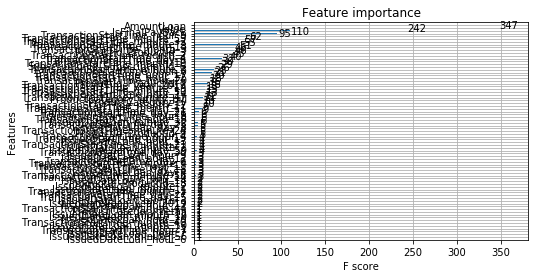

In [39]:
xgb.plot_importance(model)

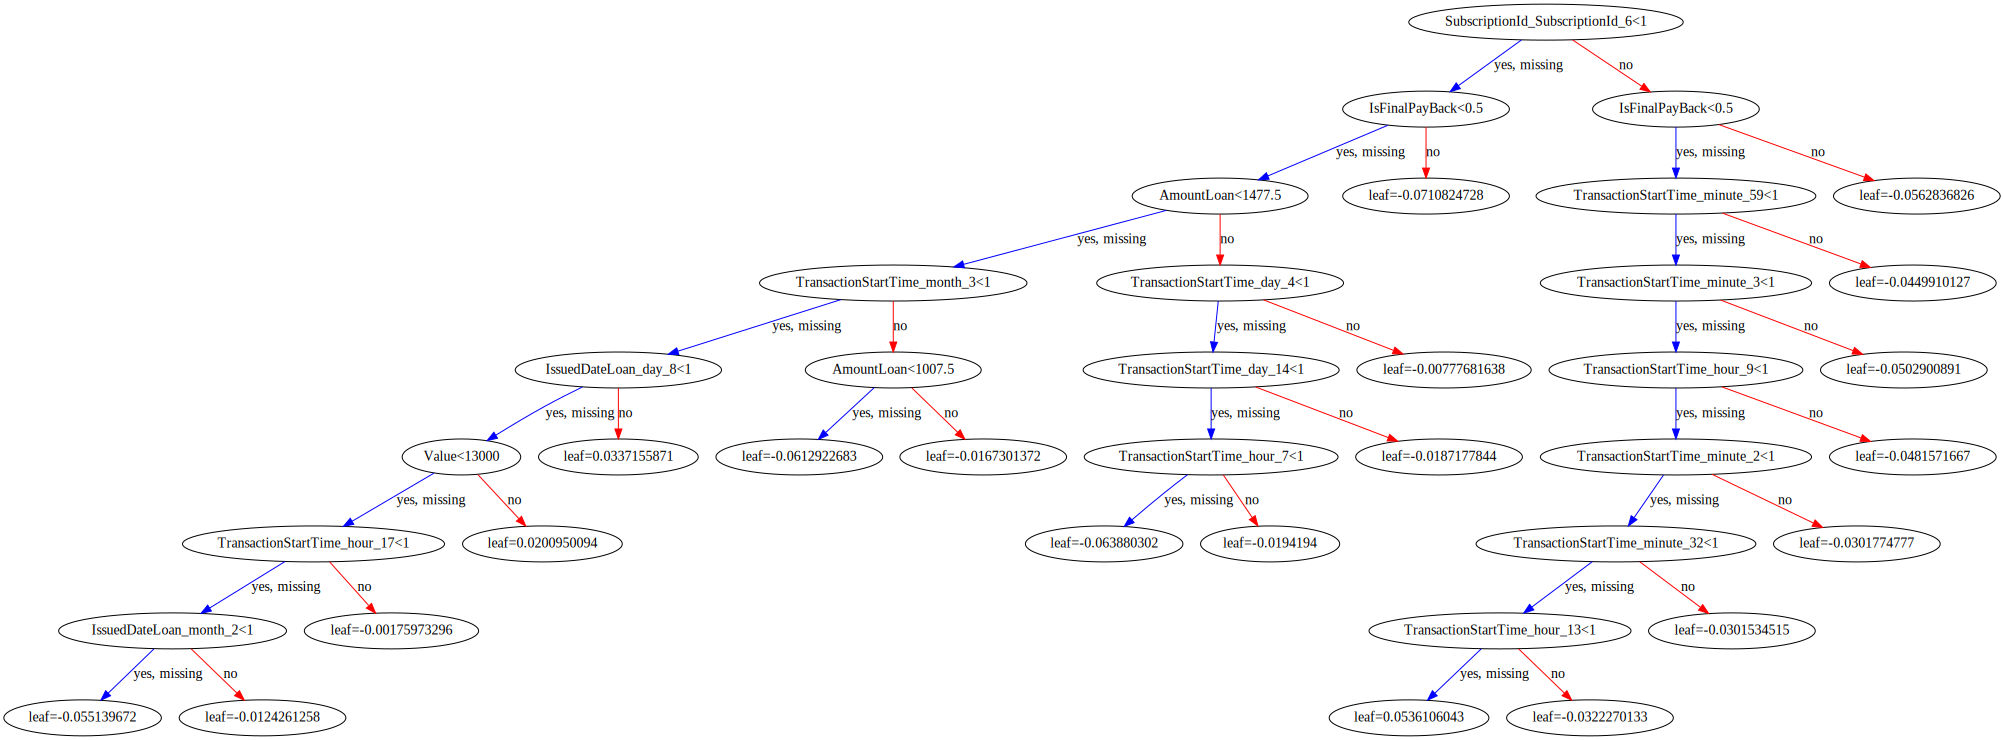

In [40]:
!pip install graphviz
xgb.to_graphviz(model, num_trees=10)